## Import Library

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.datasets as tfds


In [3]:
import warnings
warnings.filterwarnings('ignore')

## DNN - Simple Regression
### membuat data

In [8]:
x = np.array([4,5,6,7,8,9],dtype = float)
y = np.array([5,6,7,10,12,14],dtype= float)

### visualisasi scatter

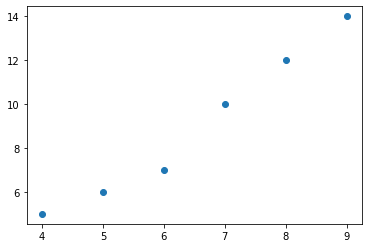

In [9]:
plt.scatter(x, y)
plt.show()

## Membuat Model Sequential
#### Tahap Modeling
a. arsitektur
b. konfigurasi
c. model training

In [15]:
#membuat model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [16]:
#konfigurasi model
model.compile(
    optimizer='adam', 
    loss='mae'
)

In [18]:
#modeling data
model.fit(
    x, y,
    epochs=50, #perulangan model
    steps_per_epoch=40
)

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 17.1845
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 17.1975
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 16.7915
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 16.4202
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 16.4737
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 15.6565
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 15.3705
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 15.8415


## DNN - MNIST Regression

In [19]:
#load dataset
(x_train, y_train),(x_test, y_test) = tfds.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [20]:
print(y_train[0])
print(x_train.shape)
print(x_test.shape)

5
(60000, 28, 28)
(10000, 28, 28)


In [21]:
num_class = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

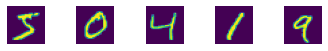

In [22]:
plt.figure()
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

## Normalisasi

In [23]:
x_train = tf.reshape(x_train,[60000, 784])
x_test = tf.reshape(x_test,[10000, 784])

In [24]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [25]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

## Membuat Model

In [26]:

#arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),#layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Konfigurasi Model

In [27]:

#konfigurasi
model.compile(
    optimizer = tf.keras.optimizers.Adam(), #adam(learning_rate=1e-4)
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)


### Training Model

In [29]:
# training
history = model.fit(
    x_train, y_train,
    epochs = 50, 
    steps_per_epoch = 15,
    batch_size=128, 
    verbose = 2 ,#tanpa animasi
    validation_data=(x_test, y_test)
)

Epoch 1/50
15/15 - 0s - loss: 0.2177 - accuracy: 0.9354 - val_loss: 0.2059 - val_accuracy: 0.9408 - 415ms/epoch - 28ms/step
Epoch 2/50
15/15 - 0s - loss: 0.2016 - accuracy: 0.9458 - val_loss: 0.2091 - val_accuracy: 0.9386 - 345ms/epoch - 23ms/step
Epoch 3/50
15/15 - 0s - loss: 0.2046 - accuracy: 0.9370 - val_loss: 0.2067 - val_accuracy: 0.9390 - 347ms/epoch - 23ms/step
Epoch 4/50
15/15 - 0s - loss: 0.2123 - accuracy: 0.9375 - val_loss: 0.2028 - val_accuracy: 0.9389 - 358ms/epoch - 24ms/step
Epoch 5/50
15/15 - 0s - loss: 0.1999 - accuracy: 0.9411 - val_loss: 0.2027 - val_accuracy: 0.9403 - 353ms/epoch - 24ms/step
Epoch 6/50
15/15 - 0s - loss: 0.2182 - accuracy: 0.9312 - val_loss: 0.2051 - val_accuracy: 0.9398 - 318ms/epoch - 21ms/step
Epoch 7/50
15/15 - 0s - loss: 0.1975 - accuracy: 0.9417 - val_loss: 0.2040 - val_accuracy: 0.9402 - 325ms/epoch - 22ms/step
Epoch 8/50
15/15 - 0s - loss: 0.1876 - accuracy: 0.9458 - val_loss: 0.2079 - val_accuracy: 0.9395 - 376ms/epoch - 25ms/step
Epoch 9/

### History Training

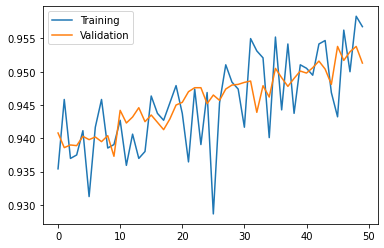

In [30]:

nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

### Evaluasi Model

In [31]:

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9513


[0.1656694859266281, 0.9513000249862671]

### Save Model

In [34]:

model.save('model/model.h10')

INFO:tensorflow:Assets written to: model/model.h10\assets


In [35]:
model_saved = tf.keras.models.load_model('model/model.h10')
model_saved.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9513


[0.1656694859266281, 0.9513000249862671]

### Prediksi Model

In [40]:
model_mnist = keras.Sequential()

In [41]:
predictions = model_mnist.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [45]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

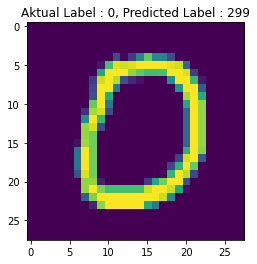

In [47]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[10])



img = x_test[10].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()

In [37]:
hasil = model_saved.predict(x_train)

1875/1875 [==============================] - 5s 3ms/step
